In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [14]:
nd = pd.read_csv('number-of-deaths-from-natural-disasters.csv')
nd.rename(columns = {'Total deaths (EMDAT (2017)) (deaths)': 'Total_deaths'}, inplace=True)
nd.drop(columns = ['Code'], inplace=True)
nd.head()

,Entity,Year,Total_deaths
0,All natural disasters,1900,1267360
1,All natural disasters,1901,200018
2,All natural disasters,1902,46037
3,All natural disasters,1903,6506
4,All natural disasters,1905,22758


In [13]:
dc = pd.read_csv('damage-costs-from-natural-disasters.csv')
dc.rename(columns = {'Total economic damage (EMDAT (2017)) (US$)': 'Total_economic_damage'}, inplace=True)
dc.drop(columns = ['Code'], inplace=True)
dc.head()

,Entity,Year,Total_economic_damage
0,All natural disasters,1900,30000000
1,All natural disasters,1903,480000000
2,All natural disasters,1906,650750000
3,All natural disasters,1907,30000000
4,All natural disasters,1908,116000000


In [15]:
nd['Entity'].value_counts()

All natural disasters    117
Extreme weather          111
Earthquake               111
Flood                     89
Landslide                 79
Epidemic                  69
Extreme temperature       55
Volcanic activity         54
Wildfire                  48
Drought                   40
Mass movement (dry)       32
Name: Entity, dtype: int64

In [16]:
dc['Entity'].value_counts()

All natural disasters    108
Extreme weather           93
Earthquake                82
Flood                     68
Drought                   48
Wildfire                  43
Extreme temperature       33
Landslide                 33
Volcanic activity         28
Mass movement (dry)        4
Epidemic                   2
Impact                     1
Name: Entity, dtype: int64

In [26]:
df = pd.merge(nd, dc, how='outer', left_on = ['Entity','Year'], 
              right_on= ['Entity','Year']).sort_values(by = 'Year').reset_index()
df.drop(columns = ['index'], inplace = True)
df.head()

,Entity,Year,Total_deaths,Total_economic_damage
0,All natural disasters,1900,1267360.0,30000000.0
1,Volcanic activity,1900,30.0,NaN
2,Flood,1900,300.0,NaN
3,Extreme weather,1900,6000.0,30000000.0
4,Epidemic,1900,30.0,NaN


/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


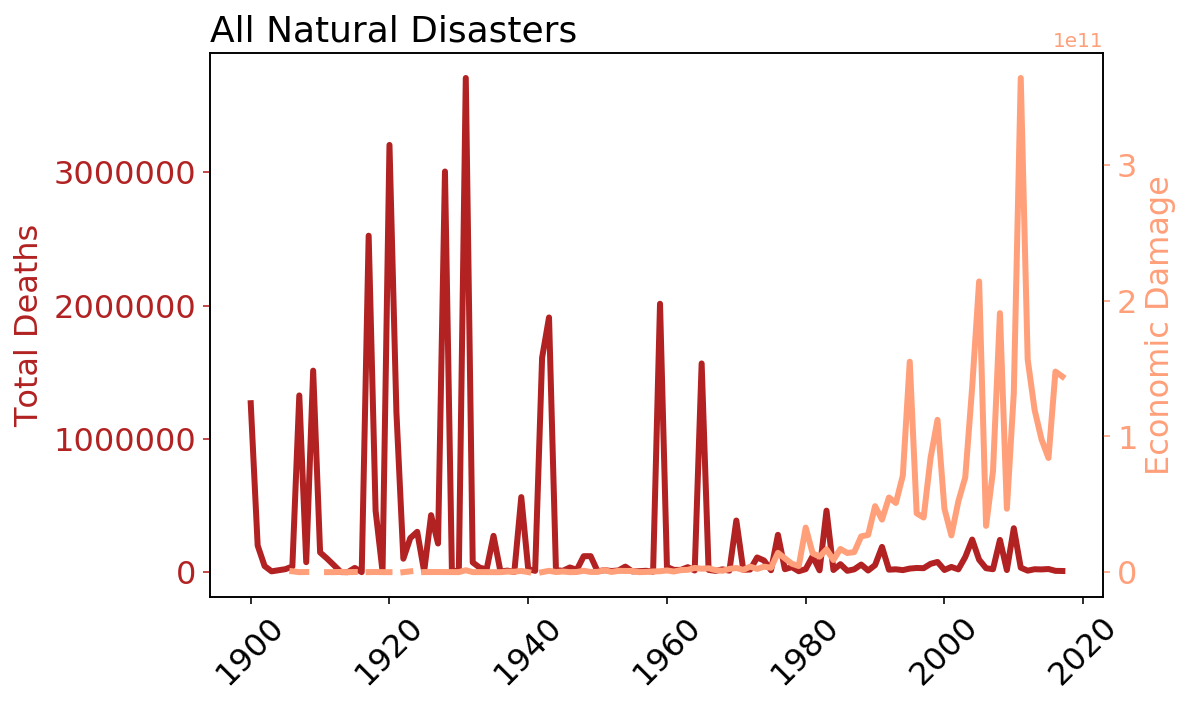

<Figure size 576x360 with 0 Axes>

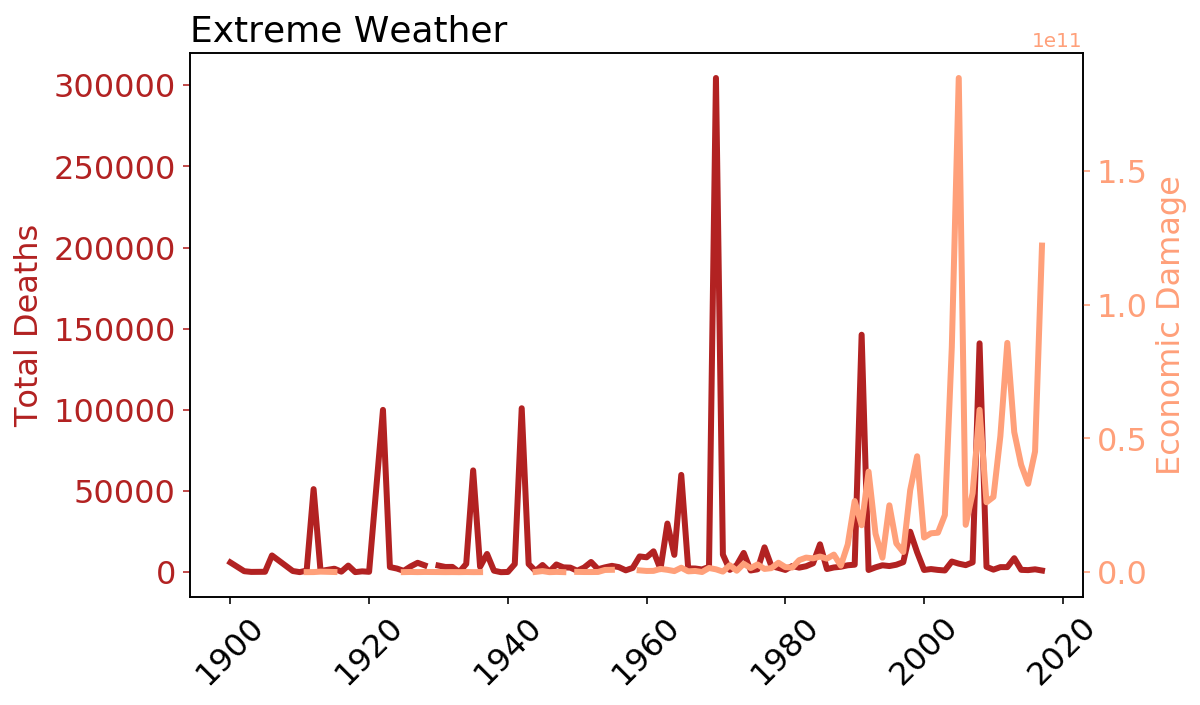

<Figure size 576x360 with 0 Axes>

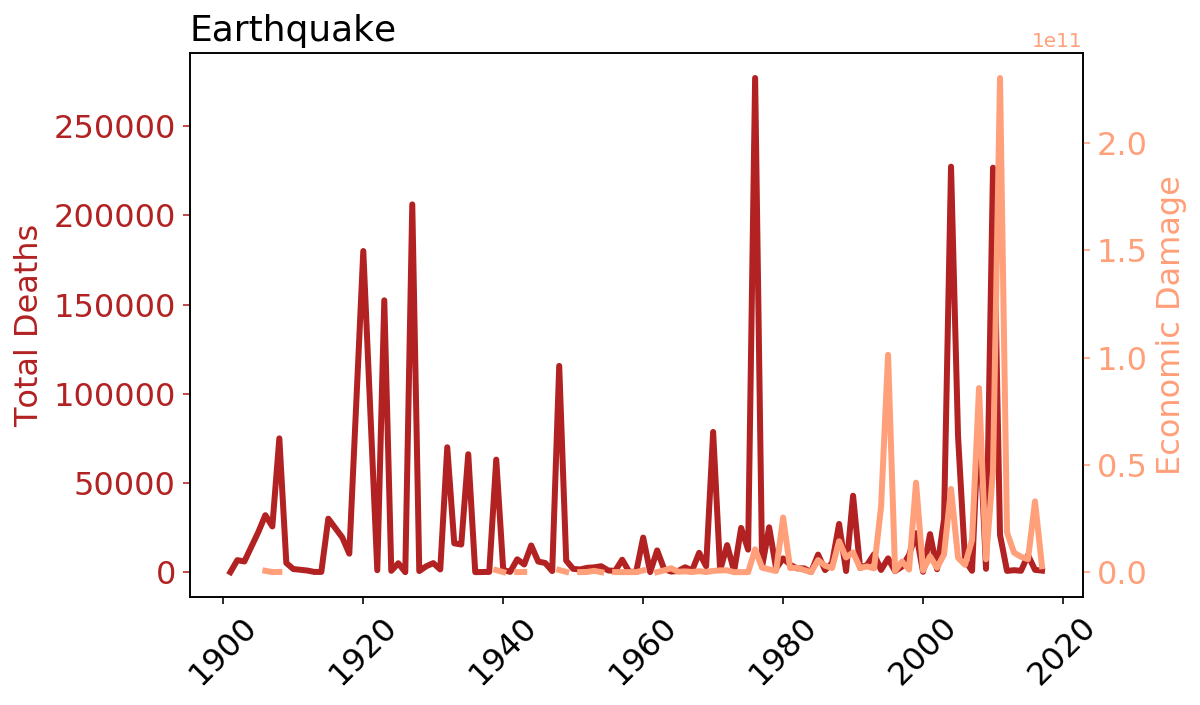

<Figure size 576x360 with 0 Axes>

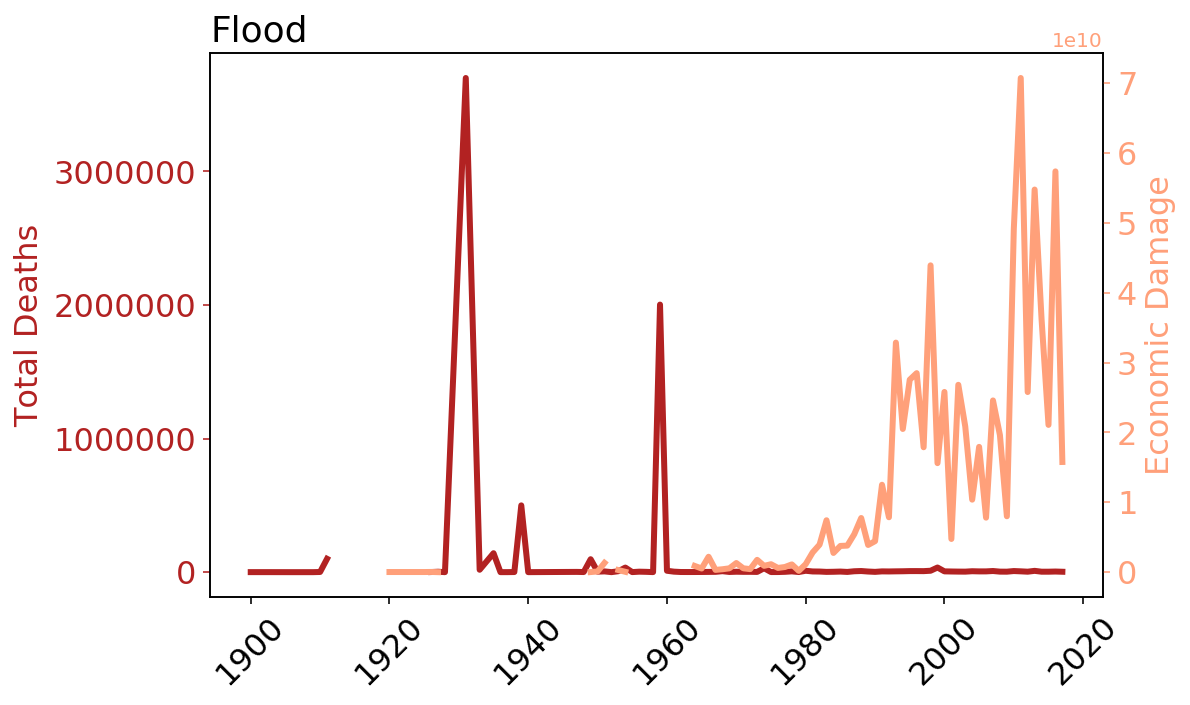

<Figure size 576x360 with 0 Axes>

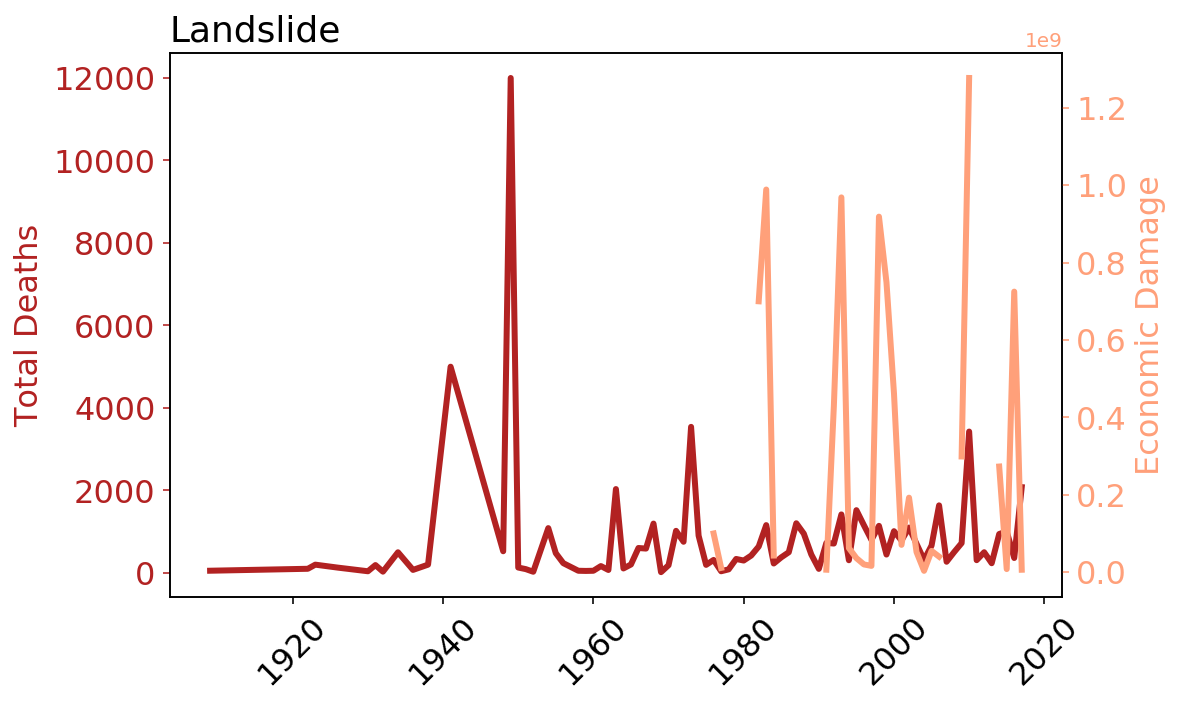

<Figure size 576x360 with 0 Axes>

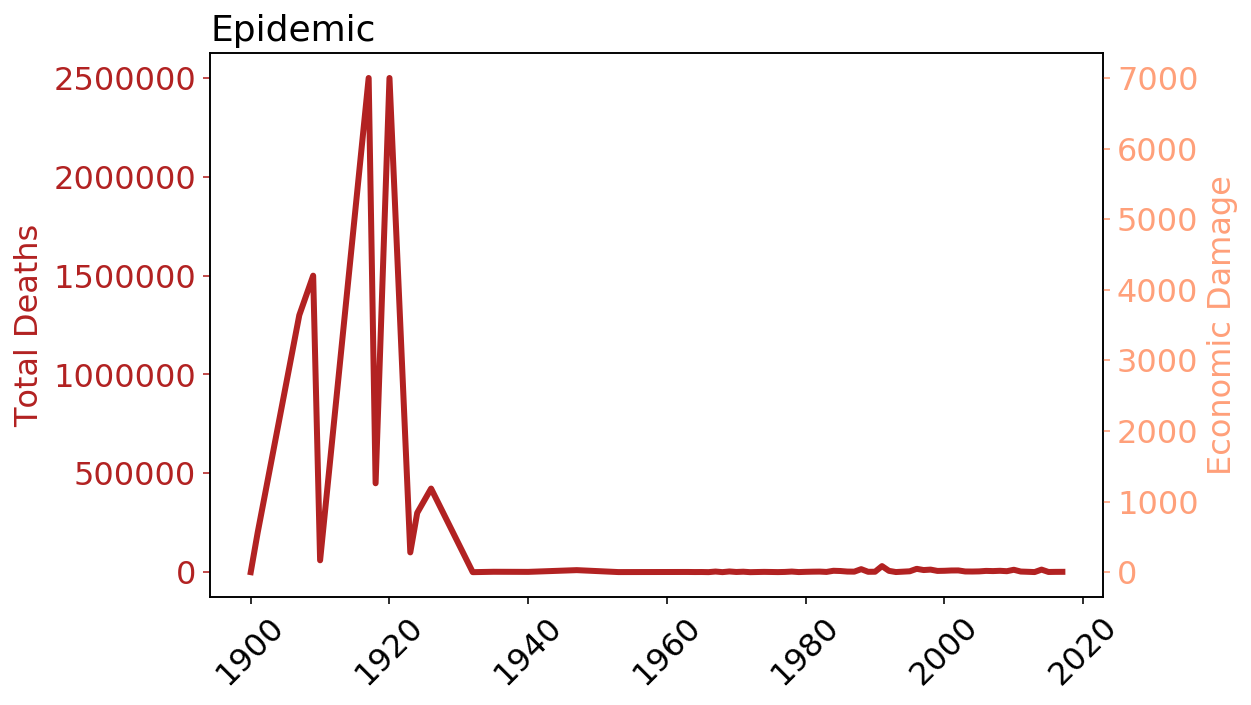

<Figure size 576x360 with 0 Axes>

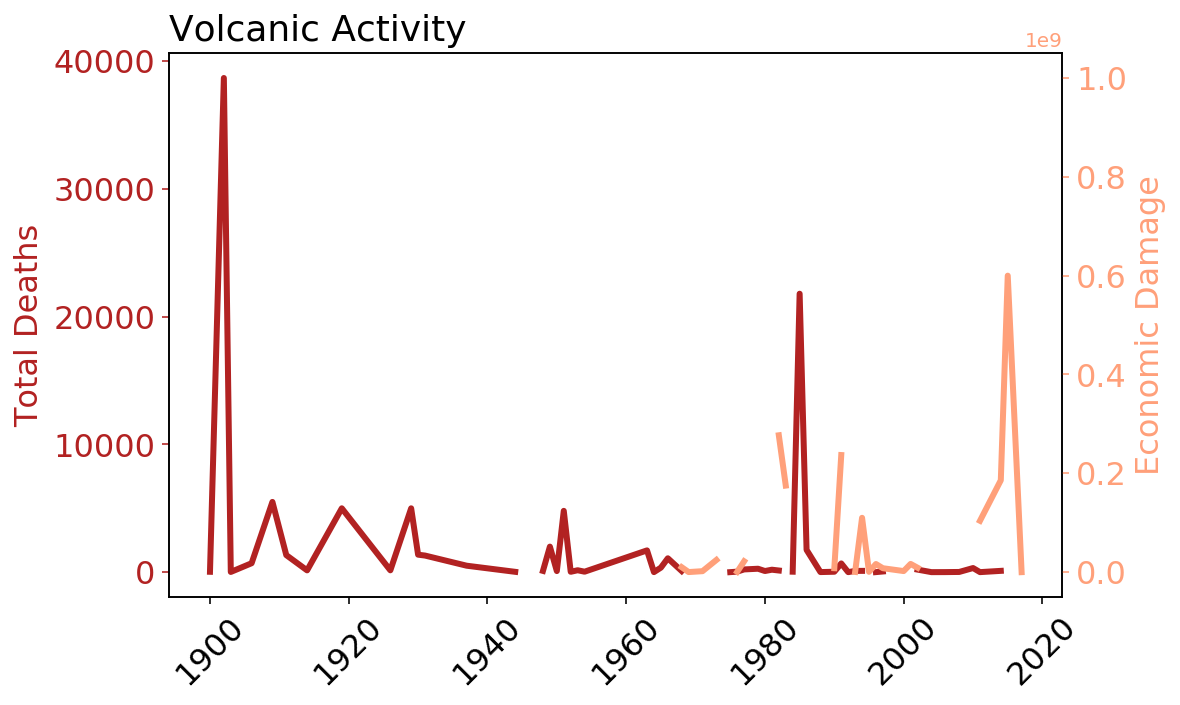

<Figure size 576x360 with 0 Axes>

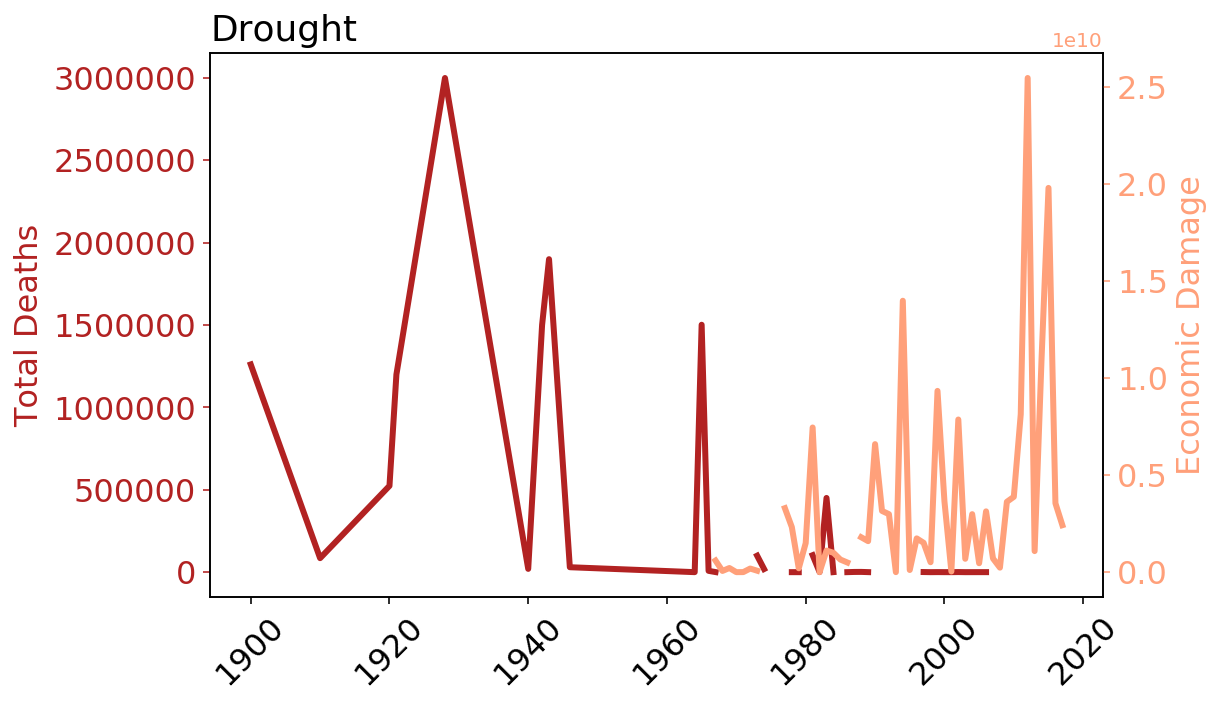

<Figure size 576x360 with 0 Axes>

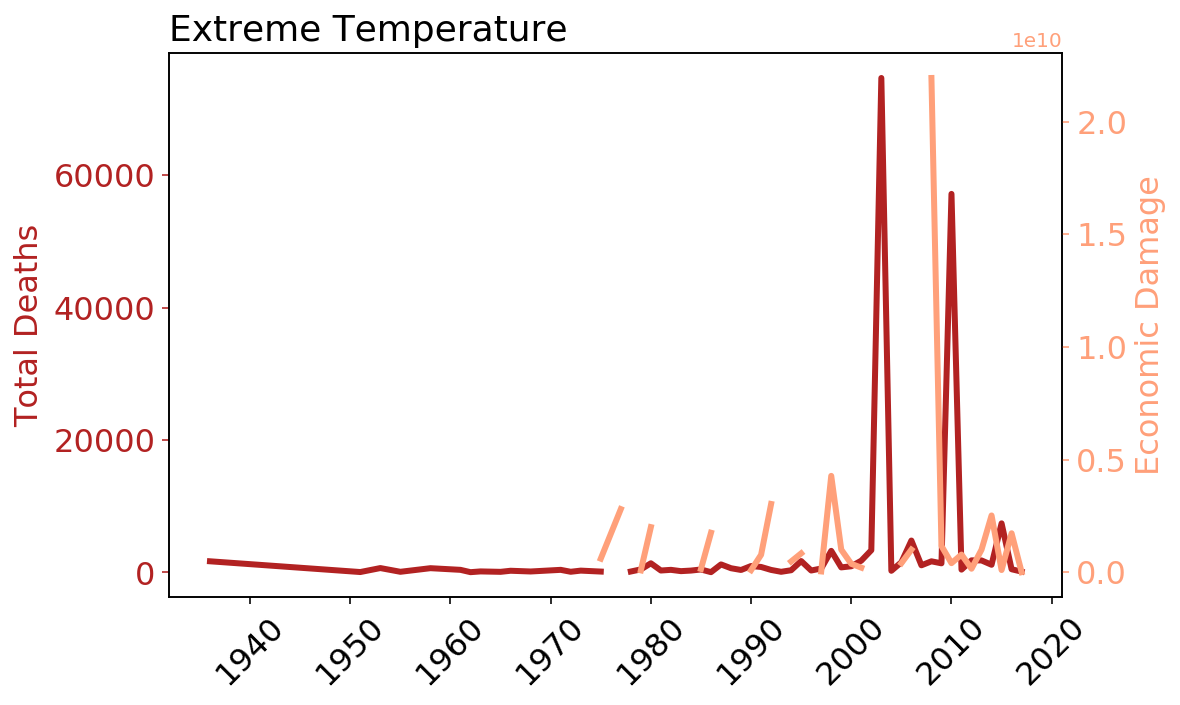

<Figure size 576x360 with 0 Axes>

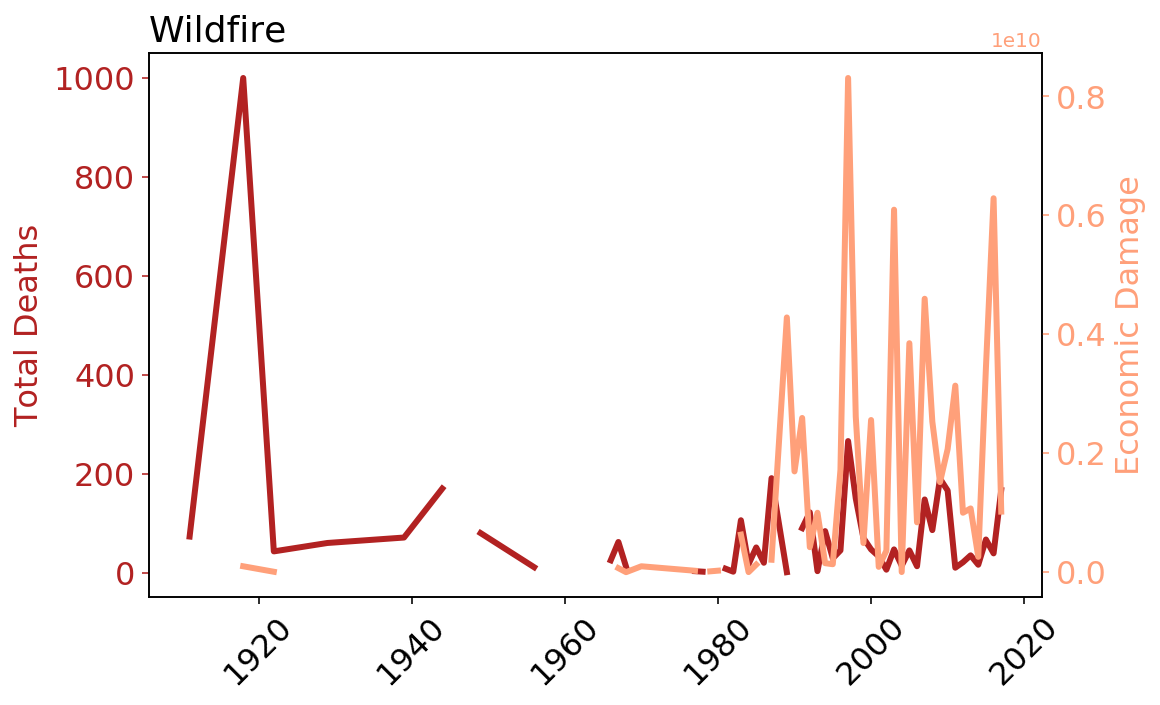

<Figure size 576x360 with 0 Axes>

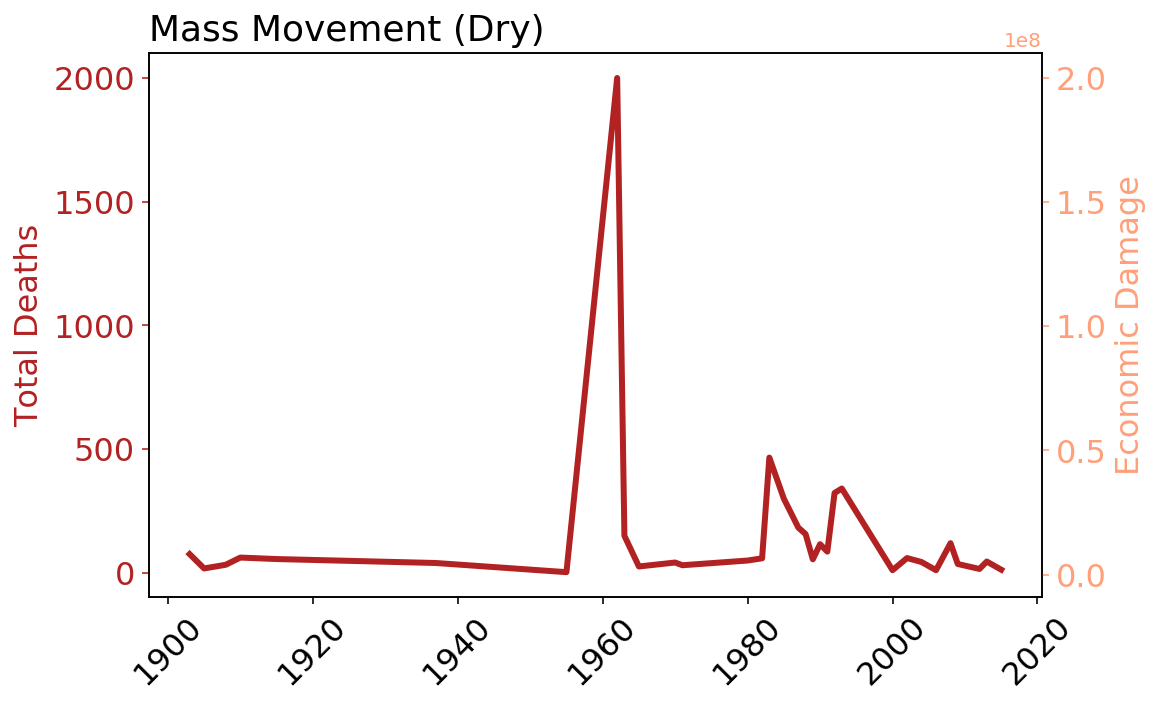

<Figure size 576x360 with 0 Axes>

In [43]:
for cause in df['Entity'].value_counts().index:
    if cause != 'Impact':
        df1 = df[df['Entity'] == cause]
        fig, ax1 = plt.subplots(figsize = (8,5))
        plt.figure(figsize=(8,5))
        ax1.plot(df1['Year'], df1['Total_deaths'], lw = 3, c ='firebrick')
        ax1.set_ylabel('Total Deaths', color='firebrick', fontsize = 16)
        ax1.tick_params('y', colors='firebrick', labelsize = 16)
        ax1.tick_params('x', labelsize = 16, rotation = 45)
        ax1.set_title(cause.title(), ha = 'left', x = 0, fontsize = 18)
        ax2 = ax1.twinx()
        ax2.plot(df1['Year'], df1['Total_economic_damage'], lw = 3, color = 'lightsalmon')
        ax2.set_ylabel('Economic Damage', color='lightsalmon', fontsize = 16)
        ax2.tick_params('y', colors='lightsalmon', labelsize = 16);
    